# Analyze USA.gov Data from Bitly

In [15]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# read data from 'bitly_usagov.txt' file
data = pd.read_json("bitly_usagov.txt", lines=True)
data.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


## Chart 1
- How many login from each time zone ?

In [62]:
# check if null values exist in 'tz' column
data["tz"].isnull().sum()

120

In [63]:
# check if values of empty string exist in 'tz' column
mask = data["tz"] == ""
data.loc[mask, "tz"].size

521

In [68]:
# replace nulls and empty strings with 'Unknown' in 'tz' column
data["tz"] = data["tz"].fillna("Unknown")
data.loc[mask, "tz"] = "Unknown"


In [69]:
# Test
print(data["tz"].isnull().sum())
mask = data["tz"] == ""
print(data.loc[mask, "tz"].size)

0
0


In [71]:
# count the occurances of each value in 'tz' column
tz_counts = data["tz"].value_counts().head(7)
tz_counts

America/New_York       1251
Unknown                 641
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Name: tz, dtype: int64

![](timezone_freq.png)

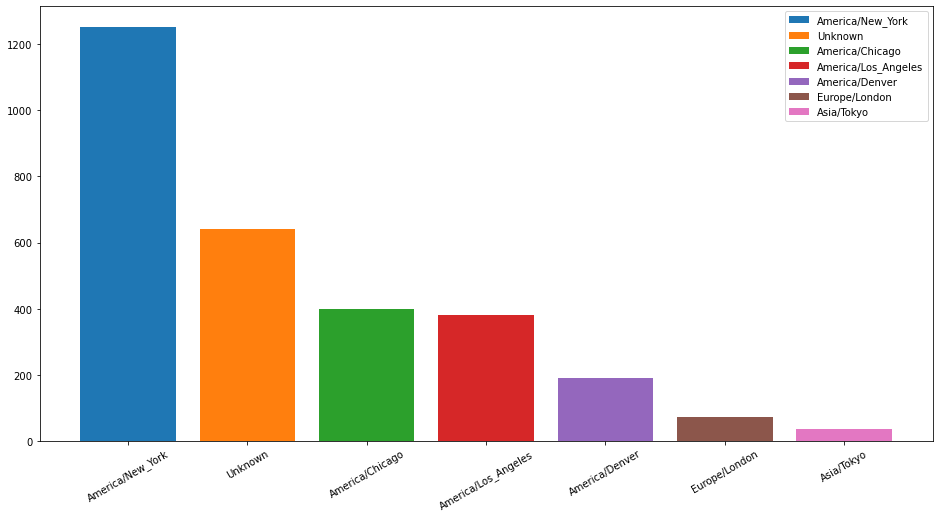

In [84]:
# display a simmilar chart using matplotlib
fig = plt.figure(figsize=(16, 8))
axes = fig.add_subplot(1, 1, 1)

for i in range(7):
    axes.bar(i, tz_counts.iloc[i], label=tz_counts.index[i])

axes.set_xticks(list(range(7)))
axes.set_xticklabels(tz_counts.index)

plt.xticks(rotation=30)
plt.legend()
plt.show()

![](timezone_freq_h.png)

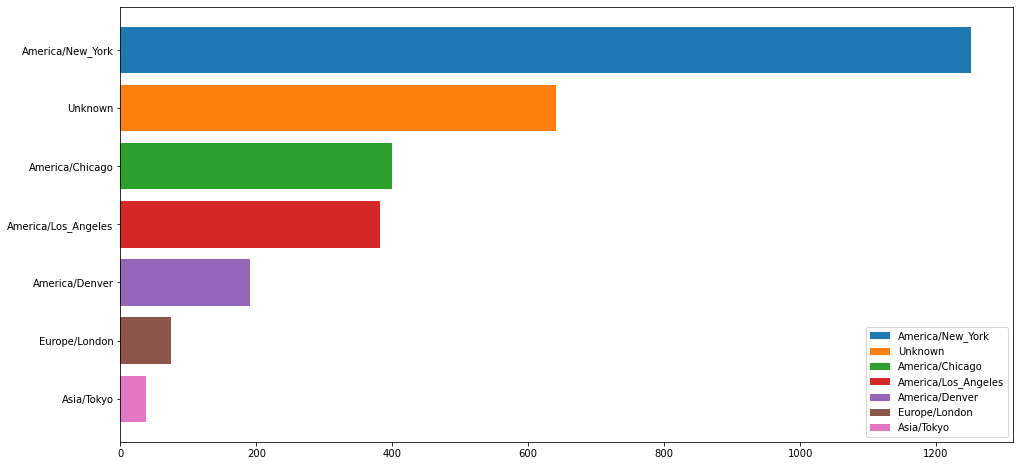

In [88]:
# display a simmilar chart using matplotlib
fig = plt.figure(figsize=(16, 8))
axes = fig.add_subplot(1, 1, 1)

for i in range(7):
    axes.barh(6 - i, tz_counts.iloc[i], label=tz_counts.index[i])

axes.set_yticks(list(range(6, -1, -1)))
axes.set_yticklabels(tz_counts.index)

plt.legend()
plt.show()

![](timezone_freq_sns.png)

<AxesSubplot:xlabel='tz'>

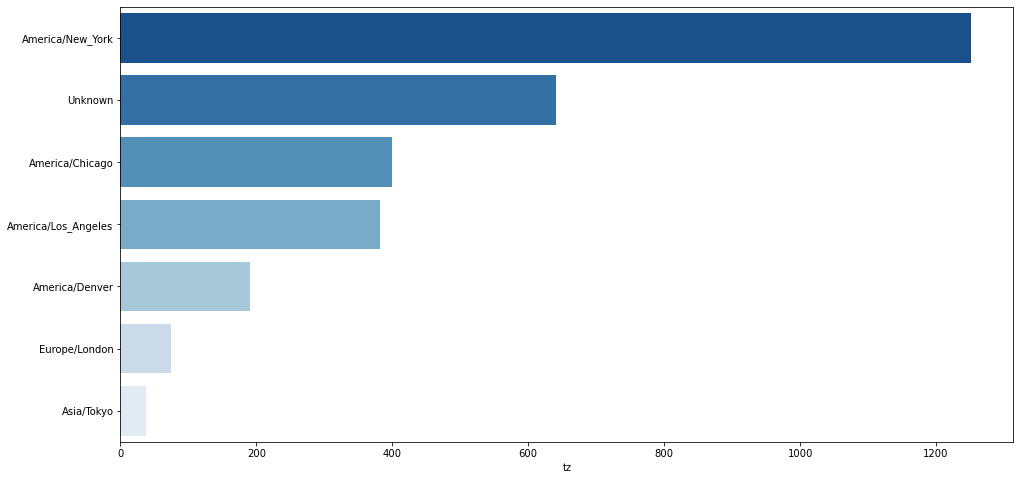

In [91]:
# display a simmilar chart using seaborn
plt.figure(figsize=(16, 8))
sns.barplot(x=tz_counts, y=tz_counts.index, palette="Blues_r")


## Chart 2
- what's the most used OS in each time zone show the top ten?

In [92]:
# check if null values exist in 'a' column
data["a"].isnull().sum()

120

In [93]:
# check if values of empty string exist in 'a' column
mask = data["a"] == ""
data.loc[mask, "a"].size

0

In [94]:
# drop rows with nulls or empty strings in 'a' column
data.dropna(subset=["a"], inplace=True)
# recheck
data["a"].isnull().sum()

0

In [97]:
# create a new column 'OS', which has the value of 'Windows' 
# if the word 'windows' exist in the 'a' column and 'Other' otherwise
data["OS"] = data["a"].map(lambda a: "Windows" if "windows" in a.lower() else "Other")
data[["a", "OS"]]

,a,OS
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Windows
1,GoogleMaps/RochesterNY,Other
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,Other
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Windows
...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,Windows
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,Windows
3557,GoogleMaps/RochesterNY,Other
3558,GoogleProducer,Other


In [114]:
# show the number of observations for each time zone and OS
tz_os_counts = data.groupby(["tz", "OS"]).size().unstack().fillna(0).astype(int)
tz_os_counts

OS,Other,Windows
tz,,
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,0,2
Africa/Johannesburg,0,1
Africa/Lusaka,0,1
...,...,...
Europe/Warsaw,1,15
Europe/Zurich,4,0
Pacific/Auckland,3,8


In [115]:
# sort the time zones descending by total observations then get the top ten
tz_os_counts["total"] = tz_os_counts["Other"] + tz_os_counts["Windows"]
tz_os_counts = tz_os_counts.sort_values("total", ascending=False).drop(columns="total").head(10)
tz_os_counts

OS,Other,Windows
tz,,
America/New_York,339,912
Unknown,245,276
America/Chicago,115,285
America/Los_Angeles,130,252
America/Denver,132,59
Europe/London,43,31
Asia/Tokyo,2,35
Pacific/Honolulu,0,36
Europe/Madrid,16,19


In [116]:
tz_os_counts = tz_os_counts.stack()
tz_os_counts.name = "count"
tz_os_counts = tz_os_counts.reset_index()
tz_os_counts

,tz,OS,count
0,America/New_York,Other,339
1,America/New_York,Windows,912
2,Unknown,Other,245
3,Unknown,Windows,276
4,America/Chicago,Other,115
5,America/Chicago,Windows,285
6,America/Los_Angeles,Other,130
7,America/Los_Angeles,Windows,252
8,America/Denver,Other,132
9,America/Denver,Windows,59


![](timezone_os_freq.png)

<AxesSubplot:xlabel='count', ylabel='tz'>

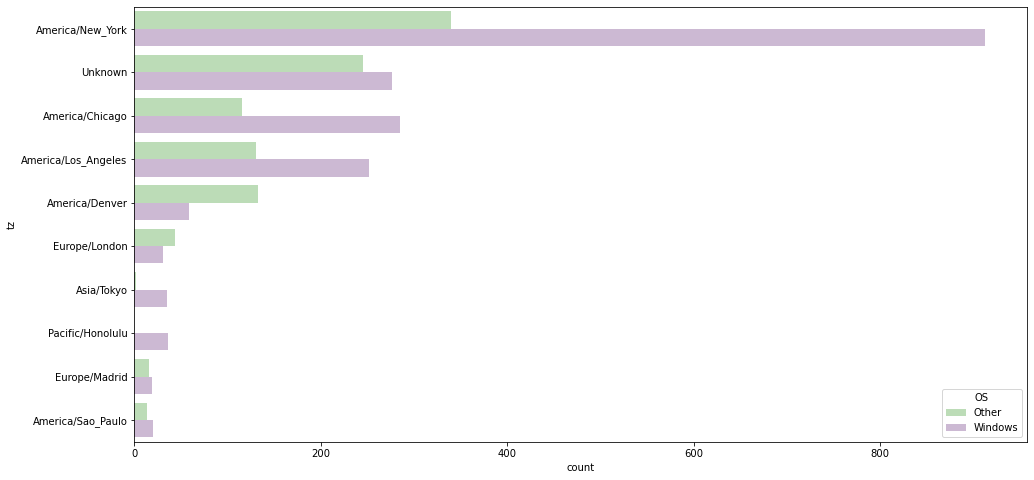

In [121]:
# display a simmilar chart using seaborn
plt.figure(figsize=(16, 8))
sns.barplot(data=tz_os_counts, x="count", y="tz", hue="OS", palette="PRGn_r")

## Chart 3
- What's the percentage of OS in each time zone ?

In [124]:
# calculate the percentage of OS in the time zone
def calc_os_percent(group):
    group["percent"] = group["count"] / group["count"].sum() * 100
    return group

tz_os_counts = tz_os_counts.groupby("tz").apply(calc_os_percent)
tz_os_counts

,tz,OS,count,percent
0,America/New_York,Other,339,27.098321
1,America/New_York,Windows,912,72.901679
2,Unknown,Other,245,47.024952
3,Unknown,Windows,276,52.975048
4,America/Chicago,Other,115,28.750000
5,America/Chicago,Windows,285,71.250000
6,America/Los_Angeles,Other,130,34.031414
7,America/Los_Angeles,Windows,252,65.968586
8,America/Denver,Other,132,69.109948
9,America/Denver,Windows,59,30.890052


![](timezone_os_freq_normed.png)

<AxesSubplot:xlabel='percent', ylabel='tz'>

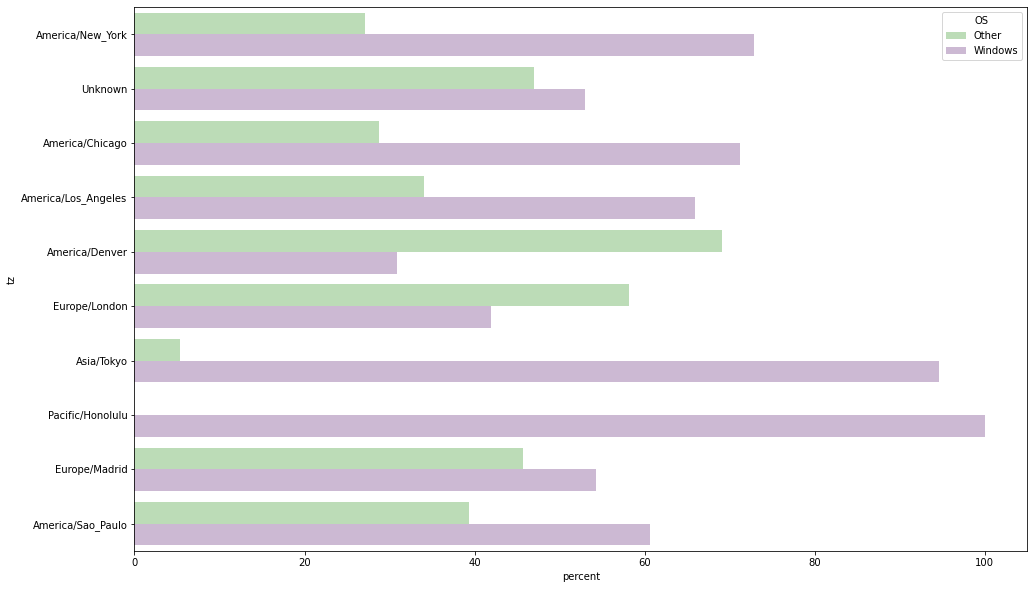

In [126]:
# display a simmilar chart using seaborn
plt.figure(figsize=(16, 10))
sns.barplot(data=tz_os_counts, x="percent", y="tz", hue="OS", palette="PRGn_r")

## Independent Practice
- explore the data from 'tips.csv'
- state some questions and draw charts to answer them